In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
print(glob.glob('/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\*.csv'))

['/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\frequencyList.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas0_P2D1_magData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas0_P2D1_phaseData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas1_P2D2_magData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas1_P2D2_phaseData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas2_P2D3_magData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas2_P2D3_phaseData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas3_P2D4_magData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2\\Meas3_P2D4_phaseData.csv', '/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/fin

In [31]:
position=list(range(1,16,1));
distances=[8- i*0.5 for i in range(0,10) ];
file_number=list(range(0,10,1))
#print(distances[0:10],file_number)

# list of files to read 

f_list=['/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2/Meas'+str(x)+'_P'+str(2)+'D'+str(x+1) +'_magData.csv' for x in file_number ];
# print(f_list)

# creating dataframe list
dfs=[pd.read_csv(f,header=None,names=['header-'+ str(x) for x in range(1,11)]) for f in f_list]
dfs[0].describe()

,header-1,header-2,header-3,header-4,header-5,header-6,header-7,header-8,header-9,header-10
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,-68.037413,-68.289860,-68.107942,-68.058462,-66.863700,-67.677188,-67.744986,-67.758638,-67.645836,-67.674163
std,5.890666,5.805542,5.767763,5.548506,5.641771,5.706862,5.805282,5.673485,5.529771,5.595850
min,-101.832000,-97.082020,-97.042960,-98.621080,-94.300790,-99.761710,-96.996080,-94.460930,-102.933600,-100.296900
25%,-70.761720,-71.277340,-71.140620,-71.128900,-69.917960,-70.613280,-70.945310,-70.714840,-70.421870,-70.878910
50%,-67.078120,-67.328120,-67.226560,-67.257800,-66.097650,-66.945300,-66.886710,-66.886710,-66.808590,-66.789050
75%,-64.171870,-64.257810,-64.175780,-64.144530,-62.966790,-63.654290,-63.656240,-63.765620,-63.810540,-63.833980
max,-55.568350,-54.978510,-31.799800,-56.931640,-55.845700,-55.648430,-54.966790,-55.792960,-55.128900,-53.615230


In [32]:
# read frequency file
freq_df=pd.read_csv('/Users/Amit/Documents/PythonTutorial/RF modeling/matlab/final_mes/in_nlos/P2/frequencyList.csv',header=None,names=['frequency'])

# append the frequency column in all dataframes

dff = [dfs[x].merge(freq_df, right_index=True, left_index=True,how='outer').reset_index() for x in file_number]
#dfs[0].plot.scatter(x='header-1',y='header-2',c='darkblue')

In [33]:
dff[1].head()

,index,header-1,header-2,header-3,header-4,header-5,header-6,header-7,header-8,header-9,header-10,frequency
0,0,-67.52343,-76.59765,-67.66796,-67.55077,-67.57813,-70.65624,-66.34375,-67.82812,-72.77344,-68.29296,3.100000e+09
1,1,-65.17968,-66.46484,-68.87890,-69.69140,-76.60546,-70.64453,-67.20312,-69.44140,-69.75390,-70.58984,3.104685e+09
2,2,-76.07422,-70.40234,-68.19140,-67.10155,-69.60155,-67.94922,-70.65624,-76.77343,-82.41014,-74.48047,3.109369e+09
3,3,-63.99219,-67.87499,-74.87499,-72.33593,-64.62109,-70.99609,-67.93359,-69.51562,-64.81250,-70.00390,3.114054e+09
4,4,-68.59375,-72.77344,-69.15625,-72.07812,-70.55859,-74.55859,-66.01171,-75.96093,-70.33984,-67.98828,3.118738e+09


In [88]:
# for 3.1-4 Ghz

#cond = [dff[k].apply(lambda k: if (dff[k].frequency>=3.1*10**9) &  (dff[k].frequency <4.1*10**9)) for k in range(0,10)]
#cond_total = functools.reduce(lambda x, y: x & y, cond)
#print(df[cond_total])


daff = {k: pd.DataFrame() for k in range(0,10)}

for x in range(0,10):
    daff[x]=dff[x][(dff[x].frequency>=3.1*10**9) &  (dff[x].frequency <6.1*10**9)]



#dff_3=dff[1][(dff[1].frequency>=3.1*10**9) &  (dff[1].frequency <4.1*10**9)] 


In [89]:
y=np.array([daff[i].mean(axis=0) for i in range(0,10)])
print((y.shape))
pl=np.mean(y, axis=0)*-1;
print(pl.shape)
pl=pl[1:11]
print(pl)


(10, 12)
(12,)
[66.36197032 66.32285583 66.03247164 66.13615023 65.25626831 65.29840339
 65.5718775  65.54561668 65.63652354 65.86090376]


In [99]:
dist=10*np.log10(distances);
import seaborn as sns
dat=pd.DataFrame([dist,pl],index=['dist','pl']).T
print(dat)

       dist         pl
0  9.030900  66.361970
1  8.750613  66.322856
2  8.450980  66.032472
3  8.129134  66.136150
4  7.781513  65.256268
5  7.403627  65.298403
6  6.989700  65.571877
7  6.532125  65.545617
8  6.020600  65.636524
9  5.440680  65.860904


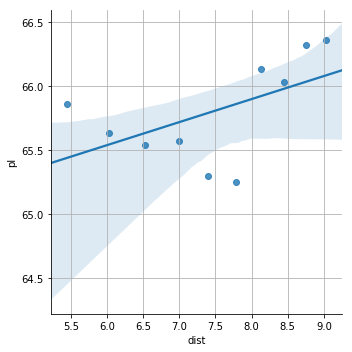

In [100]:
g=sns.lmplot(x='dist',y='pl',data=dat,fit_reg=True);
ax=g.axes[0,0];
ax.grid(True)

Text(0, 0.5, 'path loss [dB]')

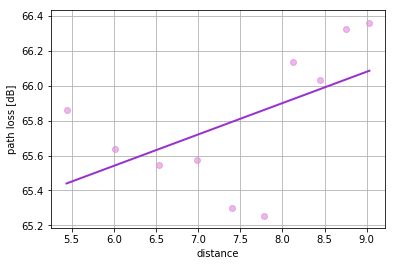

In [103]:
import statsmodels.api as sm
dist2=sm.add_constant(dist);
model=sm.OLS(pl,dist2);
fitted=model.fit();
plt.scatter(dist,pl,alpha=0.5,color='orchid');
plt.grid(True);
x_pred=np.linspace(dist.min(),dist.max(),50);
x_pred2=sm.add_constant(x_pred); y_pred=fitted.predict(x_pred2);
plt.plot(x_pred,y_pred,'-',color='darkorchid',linewidth=2)
plt.xlabel('distance');
plt.ylabel('path loss [dB]')


In [104]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3.238
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.110
Time:                        15:22:08   Log-Likelihood:                -2.8369
No. Observations:                  10   AIC:                             9.674
Df Residuals:                       8   BIC:                             10.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4608      0.754     85.480      0.0

C:\Python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
